In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("dataset/SMS_train.csv", encoding='ISO-8859-1')
test = pd.read_csv("dataset/SMS_test.csv", encoding='ISO-8859-1')


In [4]:
train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [6]:
test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [7]:
train.shape

(957, 3)

In [8]:
test.shape

(125, 3)

In [9]:
train.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [10]:
test.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
train['Label'] = encoder.fit_transform(train['Label'])
test['Label'] = encoder.transform(test['Label'])

In [13]:
train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


In [14]:
test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",1
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1
2,3,Congrats! Nokia 3650 video camera phone is you...,1
3,4,URGENT! Your Mobile number has been awarded wi...,1
4,5,Someone has contacted our dating service and e...,1


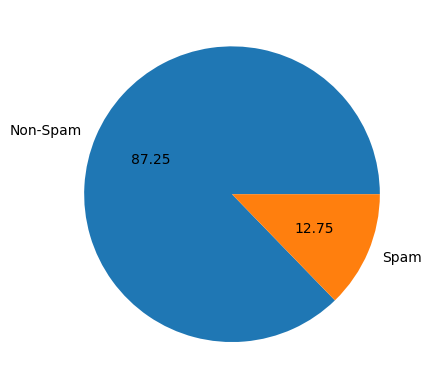

In [15]:
train['Label'].value_counts()
plt.pie(train['Label'].value_counts(), labels=['Non-Spam','Spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
train.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [20]:
import nltk
import re

try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt", quiet=True)

def add_columns(df):
    df['num_of_characters'] = df['Message_body'].apply(len)

    def safe_word_tokens(text):
        try:
            return len(nltk.word_tokenize(text))
        except LookupError:
            return len(text.split())

    def safe_sentence_tokens(text):
        try:
            return len(nltk.sent_tokenize(text))
        except LookupError:
            # fallback: tách bằng dấu . ! ?
            return len([s for s in re.split(r'[.!?]+', text) if s.strip()])

    df['num_words'] = df['Message_body'].apply(safe_word_tokens)
    df['num_sentences'] = df['Message_body'].apply(safe_sentence_tokens)

    return df

train = add_columns(train)
test = add_columns(test)


In [21]:
train.head()

,S. No.,Message_body,Label,num_of_characters,num_words,num_sentences
0,1,Rofl. Its true to its name,0,26,6,2
1,2,The guy did some bitching but I acted like i'd...,0,125,26,1
2,3,"Pity, * was in mood for that. So...any other s...",0,57,10,3
3,4,Will ü b going to esplanade fr home?,0,36,8,1
4,5,This is the 2nd time we have tried 2 contact u...,1,160,30,5


In [22]:
test.head()

,S. No.,Message_body,Label,num_of_characters,num_words,num_sentences
0,1,"UpgrdCentre Orange customer, you may now claim...",1,175,29,5
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1,162,28,5
2,3,Congrats! Nokia 3650 video camera phone is you...,1,157,26,2
3,4,URGENT! Your Mobile number has been awarded wi...,1,136,22,5
4,5,Someone has contacted our dating service and e...,1,162,27,3


In [23]:
train[['num_of_characters','num_words','num_sentences']].describe()

,num_of_characters,num_words,num_sentences
count,957.000000,957.000000,957.000000
mean,78.118077,15.132706,2.354232
std,55.732960,10.688933,1.651332
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,59.000000,12.000000,2.000000
75%,113.000000,22.000000,3.000000
max,446.000000,96.000000,11.000000


In [24]:
train[train['Label'] == 0][['num_of_characters','num_words','num_sentences']].describe()

,num_of_characters,num_words,num_sentences
count,835.000000,835.000000,835.000000
mean,69.002395,13.851497,2.118563
std,53.045250,10.670427,1.487463
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,51.000000,10.000000,2.000000
75%,89.000000,18.000000,3.000000
max,446.000000,96.000000,11.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

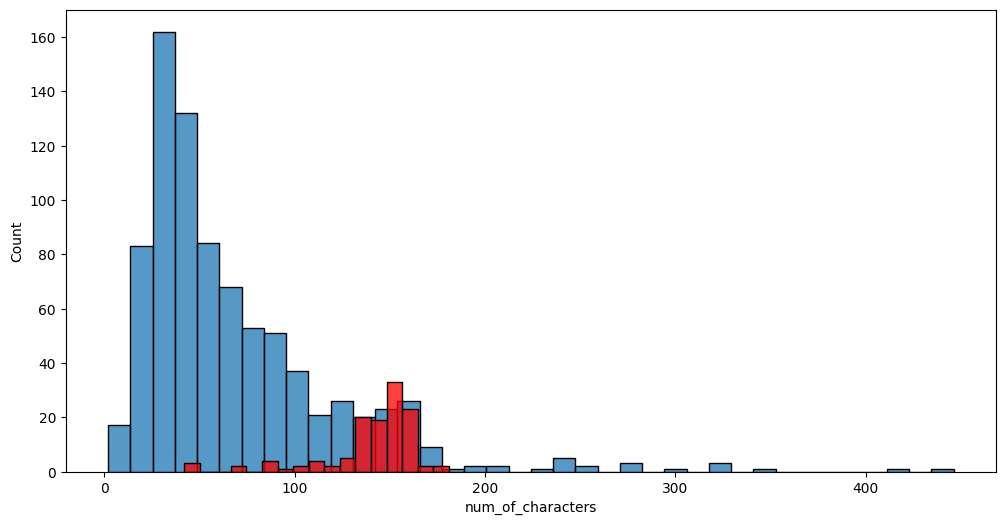

In [26]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(train[train['Label'] == 0]['num_of_characters'])
sns.histplot(train[train['Label'] == 1]['num_of_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

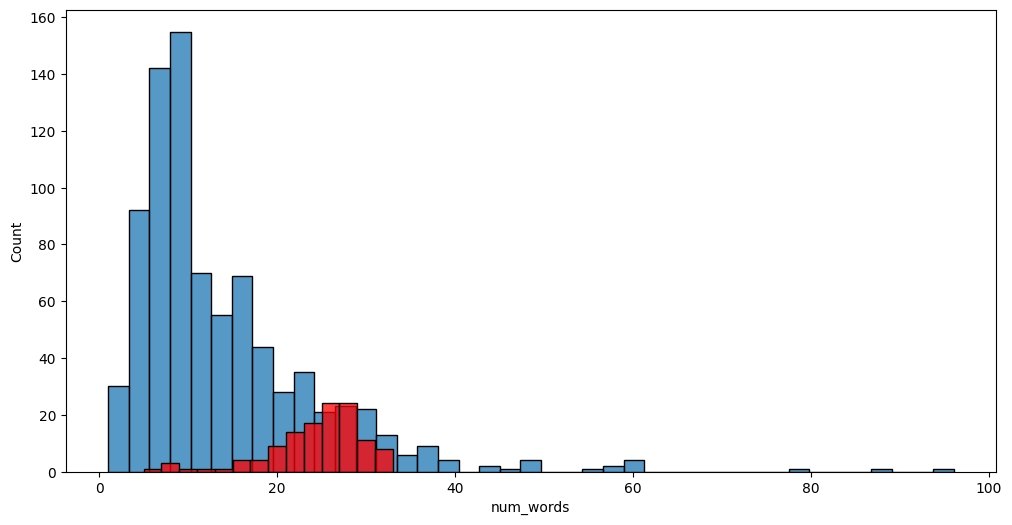

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(train[train['Label'] == 0]['num_words'])
sns.histplot(train[train['Label'] == 1]['num_words'],color='red')


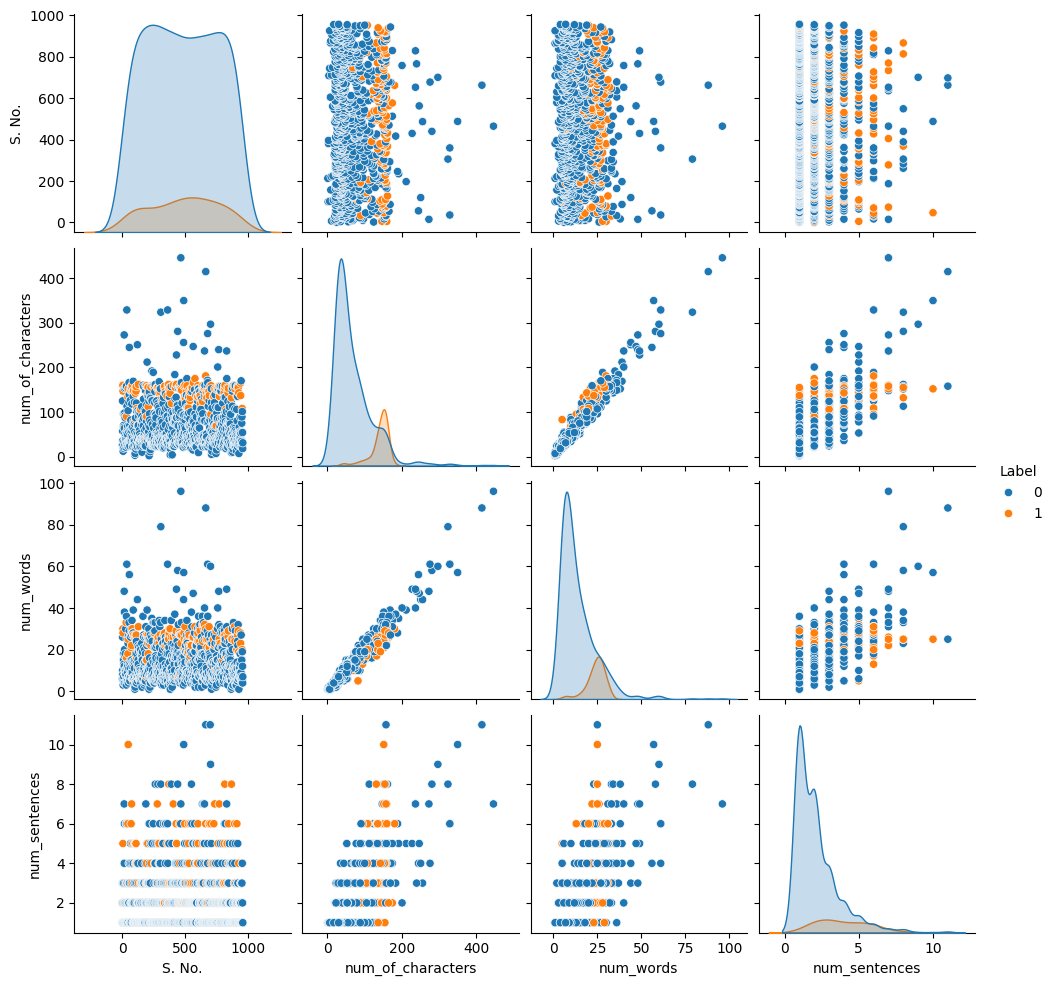

In [28]:
sns.pairplot(train,hue='Label')

<Axes: >

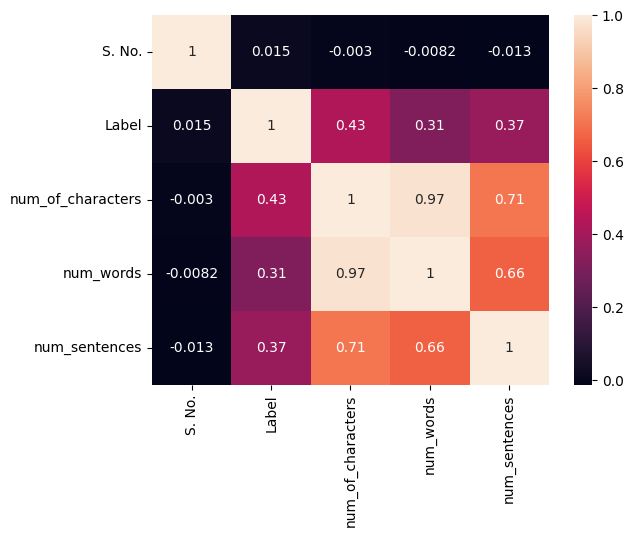

In [29]:
sns.heatmap(train.corr(numeric_only=True),annot=True)

In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()

In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [34]:
import nltk
import re

# chỉ tải một lần
PUNKT_READY = False
def ensure_punkt():
    global PUNKT_READY
    if PUNKT_READY:
        return
    try:
        nltk.data.find("tokenizers/punkt")
        PUNKT_READY = True
    except LookupError:
        try:
            nltk.download("punkt", quiet=True)
            nltk.data.find("tokenizers/punkt")  # verify
            PUNKT_READY = True
        except Exception:
            # không tải được: sẽ dùng fallback chứ không crash
            PUNKT_READY = False

def transform_text(text):
    if not isinstance(text, str):
        return ""
    # chuẩn bị tokenizer
    ensure_punkt()

    # ví dụ tiền xử lý
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = []
    if PUNKT_READY:
        try:
            tokens = nltk.word_tokenize(text)
        except Exception:
            tokens = text.split()
    else:
        tokens = text.split()

    return " ".join(tokens)

# chắc chắn không có NaN
for df in (train, test):
    df['Message_body'] = df['Message_body'].fillna("")

train['transformed_text'] = train['Message_body'].apply(transform_text)
test['transformed_text'] = test['Message_body'].apply(transform_text)


In [35]:
train.head()

,S. No.,Message_body,Label,num_of_characters,num_words,num_sentences,transformed_text
0,1,Rofl. Its true to its name,0,26,6,2,rofl its true to its name
1,2,The guy did some bitching but I acted like i'd...,0,125,26,1,the guy did some bitching but i acted like i d...
2,3,"Pity, * was in mood for that. So...any other s...",0,57,10,3,pity was in mood for that so any other suggest...
3,4,Will ü b going to esplanade fr home?,0,36,8,1,will b going to esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,1,160,30,5,this is the 2nd time we have tried 2 contact u...


In [36]:
test.head()

,S. No.,Message_body,Label,num_of_characters,num_words,num_sentences,transformed_text
0,1,"UpgrdCentre Orange customer, you may now claim...",1,175,29,5,upgrdcentre orange customer you may now claim ...
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1,162,28,5,loan for any purpose 500 75 000 homeowners ten...
2,3,Congrats! Nokia 3650 video camera phone is you...,1,157,26,2,congrats nokia 3650 video camera phone is your...
3,4,URGENT! Your Mobile number has been awarded wi...,1,136,22,5,urgent your mobile number has been awarded wit...
4,5,Someone has contacted our dating service and e...,1,162,27,3,someone has contacted our dating service and e...


In [37]:
%pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\phanh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [39]:
spam_wc = wc.generate(train[train['Label']==1]['transformed_text'].str.cat(sep=" "))

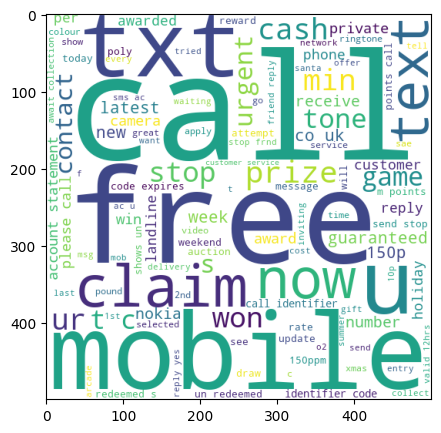

In [40]:
plt.figure(figsize=(18,5))
plt.imshow(spam_wc)

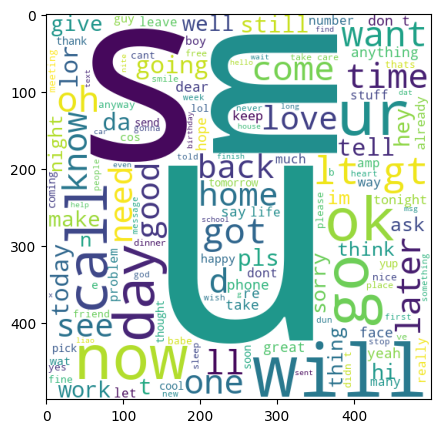

In [41]:
ham_wc = wc.generate(train[train['Label']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(18,5))
plt.imshow(ham_wc)

In [42]:
spam_corpus_train = []
for msg in train[train['Label']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus_train.append(word)

In [43]:
len(spam_corpus_train)

3135

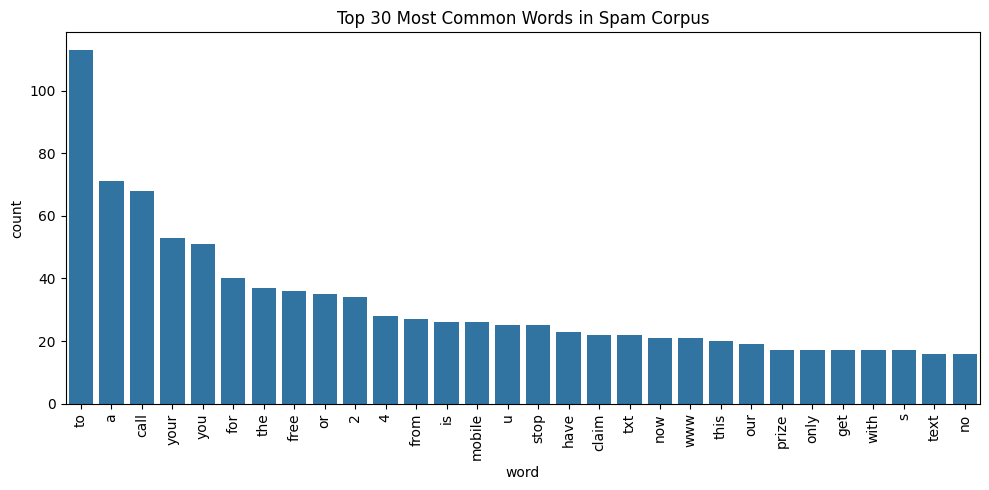

In [44]:
from collections import Counter


# Count top 30 words
spm_c = pd.DataFrame(Counter(spam_corpus_train).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=spm_c)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()

In [45]:
non_spam_corpus_train = []
for msg in train[train['Label']==0]['transformed_text'].to_list():
    for word in msg.split():
        non_spam_corpus_train.append(word)

In [46]:
len(non_spam_corpus_train)

11882

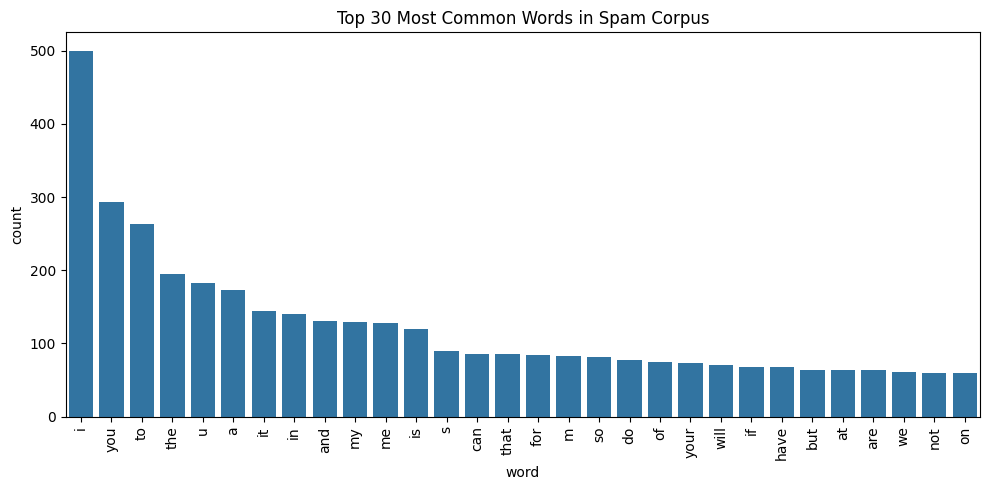

In [47]:
from collections import Counter


# Count top 30 words
spm_c = pd.DataFrame(Counter(non_spam_corpus_train).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=spm_c)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()

In [48]:
train.head()

,S. No.,Message_body,Label,num_of_characters,num_words,num_sentences,transformed_text
0,1,Rofl. Its true to its name,0,26,6,2,rofl its true to its name
1,2,The guy did some bitching but I acted like i'd...,0,125,26,1,the guy did some bitching but i acted like i d...
2,3,"Pity, * was in mood for that. So...any other s...",0,57,10,3,pity was in mood for that so any other suggest...
3,4,Will ü b going to esplanade fr home?,0,36,8,1,will b going to esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,1,160,30,5,this is the 2nd time we have tried 2 contact u...


In [49]:
test.head()

,S. No.,Message_body,Label,num_of_characters,num_words,num_sentences,transformed_text
0,1,"UpgrdCentre Orange customer, you may now claim...",1,175,29,5,upgrdcentre orange customer you may now claim ...
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1,162,28,5,loan for any purpose 500 75 000 homeowners ten...
2,3,Congrats! Nokia 3650 video camera phone is you...,1,157,26,2,congrats nokia 3650 video camera phone is your...
3,4,URGENT! Your Mobile number has been awarded wi...,1,136,22,5,urgent your mobile number has been awarded wit...
4,5,Someone has contacted our dating service and e...,1,162,27,3,someone has contacted our dating service and e...


In [50]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S. No.             957 non-null    int64 
 1   Message_body       957 non-null    object
 2   Label              957 non-null    int32 
 3   num_of_characters  957 non-null    int64 
 4   num_words          957 non-null    int64 
 5   num_sentences      957 non-null    int64 
 6   transformed_text   957 non-null    object
dtypes: int32(1), int64(4), object(2)
memory usage: 48.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S. No.             125 non-null    int64 
 1   Message_body       125 non-null    object
 2   Label              125 non-null    int32 
 3   num_of_characters  125 non-null    int64 
 4   num_words       

In [51]:
y_train = train['Label']
y_test = test['Label']

In [52]:
from sklearn.preprocessing import StandardScaler

num_features_train = train[['num_of_characters', 'num_words', 'num_sentences']]
num_features_test = test[['num_of_characters', 'num_words', 'num_sentences']]
scaler = StandardScaler()
num_features_scaled_train = scaler.fit_transform(num_features_train)
num_features_scaled_test = scaler.transform(num_features_test)

In [54]:
import os
import nltk
from nltk.tokenize import word_tokenize

# ép tải vào thư mục project để chắc chắn có quyền
DATA_DIR = os.path.join(os.getcwd(), "nltk_data")
nltk.download("punkt", download_dir=DATA_DIR, quiet=True)
# thêm vào path tìm kiếm
nltk.data.path.append(DATA_DIR)

# kiểm tra xem punkt đã sẵn sàng
try:
    nltk.data.find("tokenizers/punkt")
    punkt_ready = True
except LookupError:
    punkt_ready = False
    print("WARNING: punkt tokenizer không load được, sẽ fallback bằng split đơn giản.")

def safe_word_tokenize(text):
    if not isinstance(text, str):
        return []
    if punkt_ready:
        try:
            return word_tokenize(text)
        except Exception:
            pass
    # fallback đơn giản
    return text.split()

# áp dụng
X_train_raw = train['transformed_text'].fillna("").astype(str)
X_test_raw = test['transformed_text'].fillna("").astype(str)

X_train_tok = [safe_word_tokenize(t) for t in X_train_raw]
X_test_tok = [safe_word_tokenize(t) for t in X_test_raw]


In [57]:
from gensim.models import FastText

ft_model = FastText(sentences=X_train_tok, vector_size=100, window=5, min_count=1, workers=4)

def get_ft_vector(tokens, model, dim):
    valid_words = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(valid_words, axis=0) if valid_words else np.zeros(dim)

X_train_vec = np.array([get_ft_vector(toks, ft_model, 100) for toks in X_train_tok])
X_test_vec  = np.array([get_ft_vector(toks, ft_model, 100) for toks in X_test_tok])

In [58]:
import numpy as np

X_train_combined = np.hstack((X_train_vec, num_features_scaled_train))
X_test_combined  = np.hstack((X_test_vec, num_features_scaled_test))

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X_train = cv.fit_transform(X_train_raw).toarray()   # ✅ Learn vocab and IDF from train
X_test = cv.transform(X_test_raw).toarray()  

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train_vec,y_train)
y_pred1 = gnb.predict(X_test_vec)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.76
[[31 18]
 [12 64]]
0.7804878048780488


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.76
[[49  0]
 [30 46]]
1.0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    # 'GB' : gnb,
    # 'NB': mnb,
    # 'BB' : bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
def train_classifier(clf,X_train_combine,y_train,X_test_combined,y_test):
    clf.fit(X_train_combined,y_train)
    y_pred = clf.predict(X_test_combined)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train_combined,y_train,X_test_combined,y_test)

(0.52, 0.8076923076923077)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_combined,y_train,X_test_combined,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.52
Precision -  0.8076923076923077
For  KN
Accuracy -  0.752
Precision -  0.9090909090909091
For  DT
Accuracy -  0.688
Precision -  0.8627450980392157
For  LR
Accuracy -  0.672
Precision -  0.9487179487179487
For  RF
Accuracy -  0.688
Precision -  0.8936170212765957
For  AdaBoost
Accuracy -  0.784
Precision -  0.9016393442622951
For  BgC
Accuracy -  0.816
Precision -  0.9206349206349206
For  ETC
Accuracy -  0.648
Precision -  0.9210526315789473
For  GBDT
Accuracy -  0.8
Precision -  0.9047619047619048
For  xgb
Accuracy -  0.792
Precision -  0.9032258064516129


In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.672,0.948718
7,ETC,0.648,0.921053
6,BgC,0.816,0.920635
1,KN,0.752,0.909091
8,GBDT,0.800,0.904762
9,xgb,0.792,0.903226
5,AdaBoost,0.784,0.901639
4,RF,0.688,0.893617
2,DT,0.688,0.862745
0,SVC,0.520,0.807692


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the model
svc = SVC(probability=True)  # probability=True needed for soft voting later

# Grid search with 5-fold CV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_vec, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use best estimator for predictions
best_svc = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.8725239965095986


In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Example models
rf = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(solver='liblinear')

voting_clf = VotingClassifier(
    estimators=[('svc', best_svc), ('rf', rf), ('xgb', xgb), ('lr', lr)],
    voting='soft'  # use soft for weighted average of probabilities
)

voting_clf.fit(X_train_vec, y_train)
y_pred = voting_clf.predict(X_test_vec)

from sklearn.metrics import accuracy_score
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\phanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:53:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.4


In [73]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('svc', best_svc),
        ('rf', rf),
        ('xgb', xgb),
        ('lr', lr)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train_vec, y_train)
y_pred_stack = stacking_clf.predict(X_test_vec)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.568
